In [27]:
from IPython.display import display, Math
from sympy import Symbol, sin, cos
from sympy.plotting import plot
from math import pi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def CubicSpline(n, x, fx, case_num):
    c = [0] * (n + 1)
    z = [0] * (n + 1)
    u = [0] * (n + 1)
    h = [0] * (n + 1)
    A = [0] * (n + 1)
    b = [0] * (n + 1)
    d = [0] * (n + 1)
    l = [1] * (n + 1)
    
    # find ai
    a = fx
    
    for i in range(1, n + 1):
        h[i - 1] = x[i] - x[i - 1]
        
        
    for i in range(1, n):
        A[i] = (3 * (fx[i + 1] - fx[i]) / h[i]) - (3 * (fx[i] - fx[i - 1]) / h[i - 1])
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (A[i] - h[i - 1] * z[i - 1]) / l[i]
        
    for i in range(0, n):
        j = n - i - 1
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (fx[j + 1] - fx[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        
    # the coefficients of the natural cubic spline S(x), ai , bi , ci , di
    table = pd.DataFrame({
        '$x_{j}$': x[:-1],
        '$a_{j}$': fx[:-1],
        '$b_{j}$': b[:-1],
        '$c_{j}$': c[:-1],
        '$d_{j}$': d[:-1]
    })
    display(table)
    
    for i in range(0, n):
        t = np.arange(x[i], x[i + 1], 0.001)
        function = a[i] + b[i] * (t - x[i]) + c[i] * (t - x[i]) ** 2 + d[i] * (t - x[i]) ** 3
        plt.plot(t, function)
    plt.show()

## 1. Table 3.14

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,1.30,0.539624,0.000000,-0.247649,0.9
1,1.50,0.420752,-0.297179,0.946912,1.3
2,1.85,1.086803,1.407263,-2.956382,1.9
3,2.10,1.294942,-0.366567,-0.446635,2.1
4,2.60,0.593399,-1.036519,0.445051,2.6
5,2.70,-0.022191,-0.502457,0.174160,3.0
6,2.40,-0.503406,-0.032226,0.078076,3.9
7,2.15,-0.477075,0.084888,1.314171,4.4
8,2.05,-0.071316,1.267642,-1.581219,4.7
9,2.10,0.262340,-0.155455,0.043115,5.0


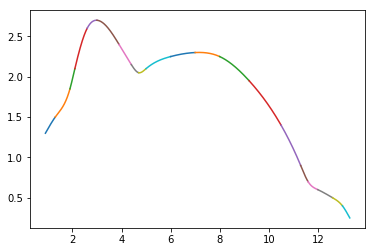

In [2]:
n = 20;
x = [
    0.9, 1.3, 1.9, 2.1, 2.6, 
    3.0, 3.9, 4.4, 4.7, 5.0, 6.0,
    7.0, 8.0, 9.2, 10.5, 11.3, 
    11.6, 12.0, 12.6, 13.0, 13.3
]
fx = [
    1.3, 1.5, 1.85, 2.1, 2.6, 
    2.7, 2.4, 2.15, 2.05, 2.1, 
    2.25, 2.3, 2.25, 1.95, 1.4, 
    0.9, 0.7, 0.6, 0.5, 0.4, 0.25
]
CubicSpline(n, x, fx, 1)

## 2. A  car  traveling  along  a  straight  road  is  clocked  at  a  number  of  points. 

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,0,73.887967,0.000000,0.123559,0
1,225,77.224066,1.112033,-0.112033,3
2,383,80.327801,0.439834,-0.183034,5
3,623,78.024896,-1.207469,0.080498,8


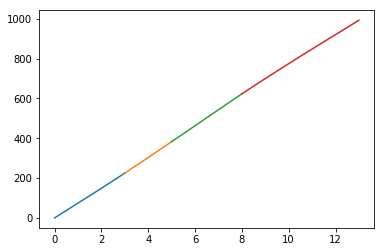

In [3]:
n = 4
x =  [0, 3, 5, 8, 13]
fx = [0, 225, 383, 623, 993]
CubicSpline(n, x, fx, 2)

## 3. The following table details the USA population from 1910 to 1980.

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,91972266,1.210006e+06,0.000000,1638.294140,1910
1,105710620,1.701494e+06,49148.824195,-4865.398699,1920
2,122775046,1.224851e+06,-96813.136780,6327.031657,1930
3,131669275,1.186698e+06,92997.812926,-2138.673928,1940
4,150697361,2.405052e+06,28837.595076,-887.267488,1950
5,203235298,2.493835e+06,-24398.454192,813.281806,1970


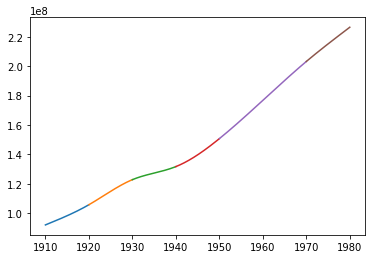

In [4]:
n = 6
x = [1910, 1920, 1930, 1940, 1950, 1970, 1980]
fx = [91972266, 105710620, 122775046, 131669275, 150697361, 203235298, 226547082]
CubicSpline(n, x, fx, 3)

4 Consider Range’s function that is defined as y = f ( x ) =1 / ( 1 / 25 x 2
. Collect interpolation data

from this function on equally 11 points in the interval [-2, 2].

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,0.009901,0.008381,0.000000,0.040527,-2.000000e+00
1,0.014196,0.021890,0.040527,-0.107737,-1.666667e+00
2,0.022005,0.012995,-0.067210,0.529003,-1.333333e+00
3,0.038462,0.144523,0.461793,-1.495187,-1.000000e+00
4,0.082569,-0.046011,-1.033394,8.431981,-6.666667e-01
5,0.264706,2.075720,7.398587,-21.024303,-3.333333e-01
6,1.000000,0.000011,-13.625716,21.024109,-3.330669e-16
7,0.264706,-2.075763,7.398394,-8.431012,3.333333e-01
8,0.082569,0.046162,-1.032618,1.491502,6.666667e-01
9,0.038462,-0.145083,0.458884,-0.515236,1.000000e+00


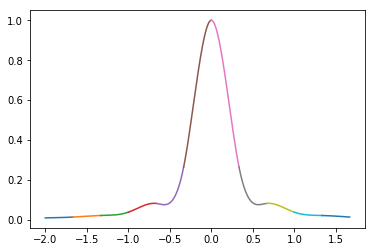

In [5]:
n = 11
j = -2
x = [0] * (n + 1)
fx = [0] * (n + 1)
for i in range(0, n + 1):
    x[i] = j
    fx[i] = 1 / (1 + 25 * j * j)
    j += 4 / (n + 1)
    
CubicSpline(n, x, fx, 4)

## 5. Repeat case 4 with more number of nodes. Thus, try a larger value of n.

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,0.009901,0.009836,0.000000,0.388093,-2.000
1,0.009980,0.009911,0.009314,-0.097803,-1.992
2,0.010060,0.010041,0.006967,0.032516,-1.984
3,0.010141,0.010159,0.007747,-0.002277,-1.976
4,0.010222,0.010282,0.007693,0.007175,-1.968
5,0.010305,0.010407,0.007865,0.004775,-1.960
6,0.010389,0.010534,0.007979,0.005554,-1.952
7,0.010474,0.010662,0.008113,0.005484,-1.944
8,0.010559,0.010793,0.008244,0.005645,-1.936
9,0.010646,0.010926,0.008380,0.005748,-1.928


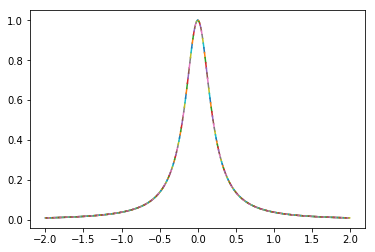

In [6]:
n = 499
j = -2
x = [0] * (n + 1)
fx = [0] * (n + 1)
for i in range(0, n + 1):
    x[i] = j
    fx[i] = 1 / (1 + 25 * j * j)
    j += 4 / (n + 1)
    
CubicSpline(n, x, fx, 4)

In [23]:
def ParametricCurves(n, t, fx, fy):
    x = CubicSpline(n, t, fx, 6)
    y = CubicSpline(n, t, fy, 6)
    
    for i in range(0, n):
        tmp = np.arange(t[i], t[i + 1], 0.001)
        function_x = FunctionValue(i, tmp, n, t, fx)
        function_y = FunctionValue(i, tmp, n, t, fy)
        plt.scatter(function_x, function_y, s=3)

    plt.show()
    
    
def FunctionValue(Z, t, n, x, fx):
    c = [0] * (n + 1)
    z = [0] * (n + 1)
    u = [0] * (n + 1)
    h = [0] * (n + 1)
    A = [0] * (n + 1)
    b = [0] * (n + 1)
    d = [0] * (n + 1)
    l = [1] * (n + 1)
    
    # find ai
    a = fx
    
    for i in range(1, n + 1):
        h[i - 1] = x[i] - x[i - 1]
        
    for i in range(1, n):
        A[i] = (3 * (fx[i + 1] - fx[i]) / h[i]) - (3 * (fx[i] - fx[i - 1]) / h[i - 1])
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (A[i] - h[i - 1] * z[i - 1]) / l[i]
        
    for i in range(0, n):
        j = n - i - 1
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (fx[j + 1] - fx[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        
    return a[Z] + b[Z] * (t - x[Z]) + c[Z] * (t - x[Z]) ** 2 + d[Z] * (t - x[Z]) ** 3

## 6. Use the following data to construct a pair of natural cubic splines S x (t) and S y (t).

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,-1,3.285714,0.000000,11.428571,0.00
1,0,5.428571,8.571429,-57.142857,0.25
2,1,-1.000000,-34.285714,89.142857,0.50
3,0,-1.428571,32.571429,-43.428571,0.75


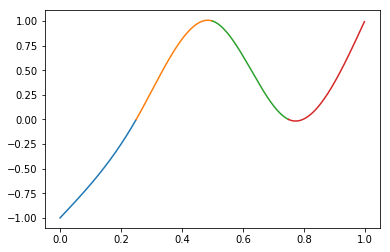

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,0.0,5.642857,0.000000,-26.285714,0.00
1,1.0,0.714286,-19.714286,35.428571,0.25
2,0.5,-2.500000,6.857143,-19.428571,0.50
3,0.0,-2.714286,-7.714286,10.285714,0.75


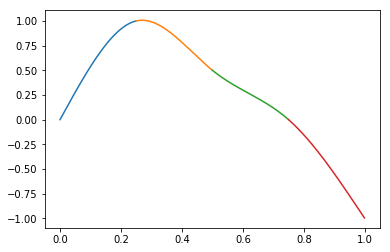

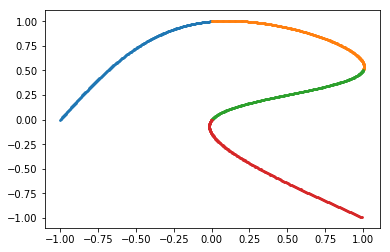

In [24]:
t = [0, 0.25, 0.5, 0.75, 1]
x = [-1, 0, 1, 0 ,1]
y = [0, 1, 0.5, 0, -1]
ParametricCurves(4, t, x, y)

## 7. Use the following data to construct a pair of natural cubic splines S x (t) and S y (t).

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,7,-3.663953,0.000000,0.663953,1
1,4,-1.672095,1.991858,-1.319763,2
2,3,-1.647668,-1.967432,0.615100,3
3,0,-3.737232,-0.122132,0.859363,4
4,-3,-1.403405,2.455959,-2.052554,5
5,-4,-2.649149,-3.701702,3.350851,6
6,-7,0.000000,6.350851,-3.350851,7
7,-4,2.649149,-3.701702,2.052554,8
8,-3,1.403405,2.455959,-0.859363,9
9,0,3.737232,-0.122132,-0.615100,10


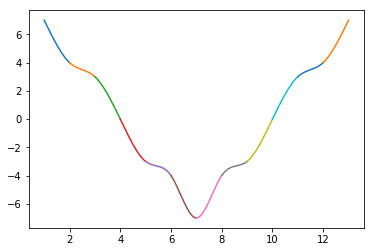

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,0,1.846154e+00,0.000000e+00,0.153846,1
1,2,2.307692e+00,4.615385e-01,0.230769,2
2,5,3.923077e+00,1.153846e+00,-2.076923,3
3,8,4.440892e-16,-5.076923e+00,2.076923,4
4,5,-3.923077e+00,1.153846e+00,-0.230769,5
5,2,-2.307692e+00,4.615385e-01,-0.153846,6
6,0,-1.846154e+00,2.775558e-17,-0.153846,7
7,-2,-2.307692e+00,-4.615385e-01,-0.230769,8
8,-5,-3.923077e+00,-1.153846e+00,2.076923,9
9,-8,0.000000e+00,5.076923e+00,-2.076923,10


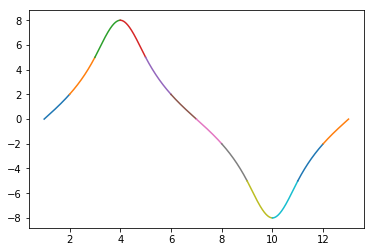

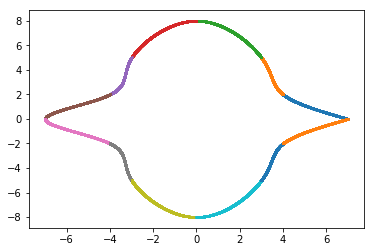

In [25]:
t = [i for i in range(1, 14)]
x = [7, 4, 3, 0, -3, -4, -7, -4, -3, 0, 3, 4, 7]
y = [0, 2, 5, 8, 5, 2, 0, -2, -5, -8, -5, -2, 0]
ParametricCurves(12, t, x, y)

## 8. A unit circle can be represented by the following parametric form:

,$Sx(t_{j})$,$t_{j}$
0,1,0.000000
1,0.996992941167792,0.077570
2,0.987989849476809,0.155140
3,0.973044870579824,0.232711
4,0.952247885338415,0.310281
5,0.925723969268890,0.387851
6,0.893632640323412,0.465421
7,0.856166899530266,0.542991
8,0.813552070262968,0.620562
9,0.766044443118978,0.698132


,$Sy(t_{j})$,$t_{j}$
0,0,0.000000
1,0.0774924206719309,0.077570
2,0.154518792807840,0.155140
3,0.230615870742440,0.232711
4,0.305325997695113,0.310281
5,0.378199858171642,0.387851
6,0.448799180200462,0.465421
7,0.516699371151863,0.542991
8,0.581492071288027,0.620562
9,0.642787609686539,0.698132


,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,1,-0.0224038152599842,0,-2.71920728533574,0.000000
1,0.996992941167792,-0.0714893208673438,-0.632788268977675,0.749695138445029,0.077570
2,0.987989849476809,-0.156127283270225,-0.458326288283536,-0.163567644196301,0.155140
3,0.973044870579824,-0.230184822267827,-0.496390207496283,0.0971427991799713,0.232711
4,0.952247885338415,-0.305441422889050,-0.473784051625694,0.0429674221400066,0.310281
5,0.925723969268890,-0.378168837489281,-0.463785078459862,0.0727504917753430,0.387851
6,0.893632640323412,-0.448807381431142,-0.446855270274198,0.0795301923543199,0.465421
7,0.856166899530266,-0.516697045427348,-0.428347754123168,0.0918780873451545,0.542991
8,0.813552070262968,-0.581492549548464,-0.406966752328396,0.102053262359587,0.620562
9,0.766044443118978,-0.642787320788821,-0.383217879787377,0.112048796094620,0.698132


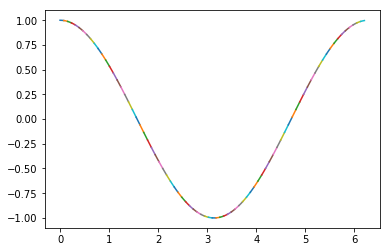

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,0,0.999999798711953,0,-0.166583078587074,0.000000
1,0.0774924206719309,0.996992740485030,-0.0387656426593721,-0.165581228351586,0.077570
2,0.154518792807840,0.987989650606261,-0.0772981441824622,-0.163583553125690,0.155140
3,0.230615870742440,0.973044674717522,-0.115365765571187,-0.160602067163408,0.232711
4,0.305325997695113,0.952247693662298,-0.152739563671327,-0.156654701472054,0.310281
5,0.378199858171642,0.925723782931720,-0.189194768063543,-0.151765195973320,0.387851
6,0.448799180200462,0.893632460445842,-0.224512132859128,-0.145962956728558,0.465421
7,0.516699371151863,0.856166727194103,-0.258479255270586,-0.139282879087691,0.542991
8,0.581492071288027,0.813551906504660,-0.290891853027084,-0.131765137822913,0.620562
9,0.642787609686539,0.766044288923388,-0.321554992951803,-0.123454945515674,0.698132


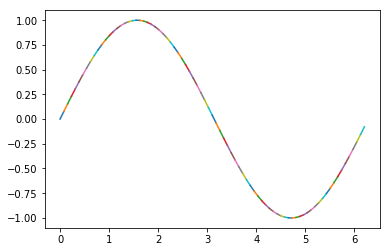

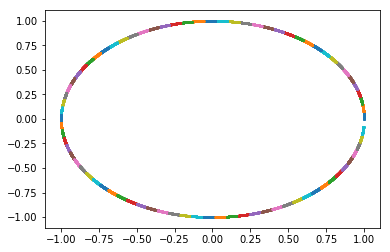

In [35]:
n = 81
t = [2 * pi * i / n for i in range(n)]
fx = [cos(t[i]) for i in range(len(t))]
fy = [sin(t[i]) for i in range(len(t))]

display(pd.DataFrame({
    '$t_{j}$': t,
    '$Sx(t_{j})$': fx
}))

display(pd.DataFrame({
    '$t_{j}$': t,
    '$Sy(t_{j})$': fy
}))

ParametricCurves(n - 1, t, fx, fy)

## 9. Repeat case 8 with more number of nodes. Thus, try a larger value of n.

,$Sx(t_{j})$,$t_{j}$
0,1,0.000000
1,0.999511457600466,0.031260
2,0.998046307749216,0.062519
3,0.995605982021898,0.093779
4,0.992192864823685,0.125039
5,0.987810291059509,0.156298
6,0.982462542875576,0.187558
7,0.976154845475345,0.218817
8,0.968893362014064,0.250077
9,0.960685187576840,0.281337


,$Sy(t_{j})$,$t_{j}$
0,0,0.000000
1,0.0312545376768243,0.031260
2,0.0624785370199826,0.062519
3,0.0936414895343508,0.093779
4,0.124712946372733,0.125039
5,0.155662548086967,0.156298
6,0.186460054291681,0.187558
7,0.217075373211714,0.218817
8,0.247478591084329,0.250077
9,0.277640001387501,0.281337


,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,1,-0.00902461227555873,0,-6.75825832604928,0.000000
1,0.999511457600466,-0.0288363999397675,-0.633781931587417,1.81938022186392,0.031260
2,0.998046307749216,-0.0631264746979130,-0.463162482659230,-0.472396023878423,0.062519
3,0.995605982021898,-0.0934678745711886,-0.507463255142856,0.148263887242320,0.093779
4,0.992192864823685,-0.124759465567143,-0.493559233084553,-0.0114823067009050,0.125039
5,0.987810291059509,-0.155650082303262,-0.494636031006280,0.0378530873405231,0.156298
6,0.982462542875576,-0.186463393277843,-0.491086210674797,0.0311312592172222,0.187558
7,0.976154845475345,-0.217074477116344,-0.488166755891100,0.0393895903428366,0.218817
8,0.968893362014064,-0.247478829570815,-0.484472844020982,0.0435873624818246,0.250077
9,0.960685187576840,-0.277639935660457,-0.480385269759422,0.0488202570143234,0.281337


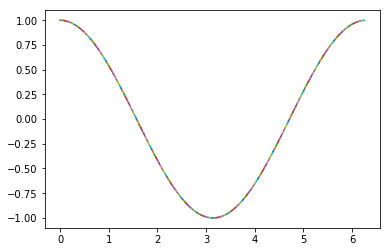

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,0,0.999999994694660,0,-0.166653094497320,0.000000
1,0.0312545376768243,0.999511452297717,-0.0156285414140533,-0.166490260291736,0.031260
2,0.0624785370199826,0.998046302454240,-0.0312418124178374,-0.166164750984199,0.062519
3,0.0936414895343508,0.995605976739869,-0.0468245575216445,-0.165676884623532,0.093779
4,0.124712946372733,0.992192859559765,-0.0623615510620305,-0.165027137898577,0.125039
5,0.155662548086967,0.987810285818839,-0.0778376120788998,-0.164216145663856,0.156298
6,0.186460054291681,0.982462537663278,-0.0932376191481058,-0.163244700331832,0.187558
7,0.217075373211714,0.976154840296512,-0.108546525157060,-0.162113751082011,0.218817
8,0.247478591084329,0.968893356873755,-0.123749372006168,-0.160824402953085,0.250077
9,0.277640001387501,0.960685182480078,-0.138831305225134,-0.159377915741648,0.281337


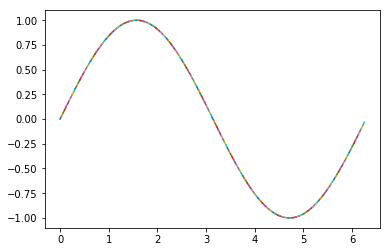

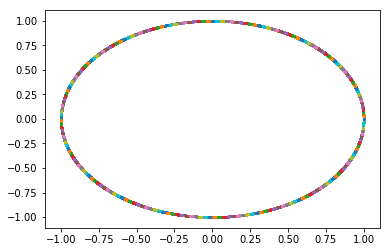

In [36]:
n = 201
t = [2 * pi * i / n for i in range(n)]
fx = [cos(t[i]) for i in range(len(t))]
fy = [sin(t[i]) for i in range(len(t))]

display(pd.DataFrame({
    '$t_{j}$': t,
    '$Sx(t_{j})$': fx
}))

display(pd.DataFrame({
    '$t_{j}$': t,
    '$Sy(t_{j})$': fy
}))

ParametricCurves(n - 1, t, fx, fy)